In [1]:
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
print(sys.path)

from lyubishchev.cli import last
from lyubishchev.report import get_highlights
from time_report_notebook import draw_bars_chart, draw_bars_effective_output, show_effective_output_highlights
from time_report_notebook import show_time_stat_as_piechart
from time_report_notebook import draw_wakeup_plot, draw_bed_plot

from icecream import ic
ic.disable()

report = last(7)
time_interval_metrics = report.get_interval_metrics()

high_lights = get_highlights(report)

ic(high_lights)

['/home/fsun/git_repo/lyubishchev/time_report_notebook', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/fsun/git_repo/lyubishchev/.venv/lib/python3.10/site-packages', '/home/fsun/git_repo/lyubishchev']


{'self_improving': 'Total time: 21.88h, daily average: 3.13h',
 'work': 'Total time: 25.43h, daily average: 5.09h',
 'effective_output': 'Total time: 47.32h, daily average: 6.76h',
 'sex': 'day has sex: 3/7, happens every 2.33 days. total hour/every time avg 1.58/0.53h',
 'sleep': 'average nap 0.57h, day has nap 6/7, happens every 1.17 days. average nightly sleep 7.74h, average all sleep time 8.3h',
 'meditation': 'daily meditation: 0.13h days with meditation: 6/7, happends every 1.17 days',
 'exercise': 'daily exercise: 0.45h, days with exercise: 6/7, happens every 1.17 days'}

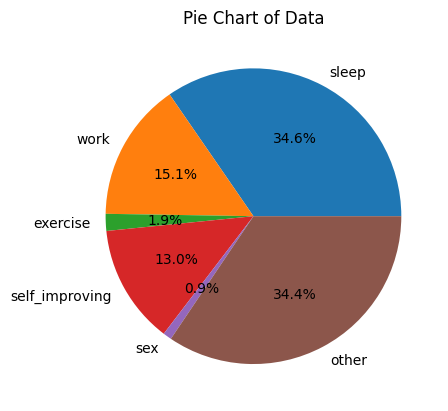

In [2]:
show_time_stat_as_piechart(report.get_time_stats())

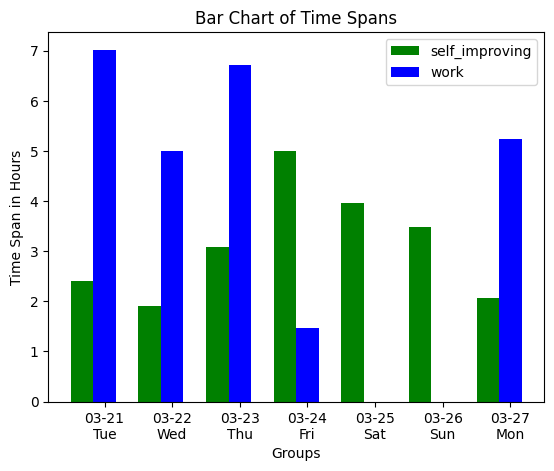

effective_output:		 Total time: 47.32h, daily average: 6.76h
self_improving:			 Total time: 21.88h, daily average: 3.13h
work:				 Total time: 25.43h, daily average: 5.09h


In [3]:
# effective output
draw_bars_effective_output(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    self_improving_minutes=time_interval_metrics["effective_output"]["self_improving"],
    work_minutes=time_interval_metrics["effective_output"]["work"],
)
show_effective_output_highlights(high_lights)

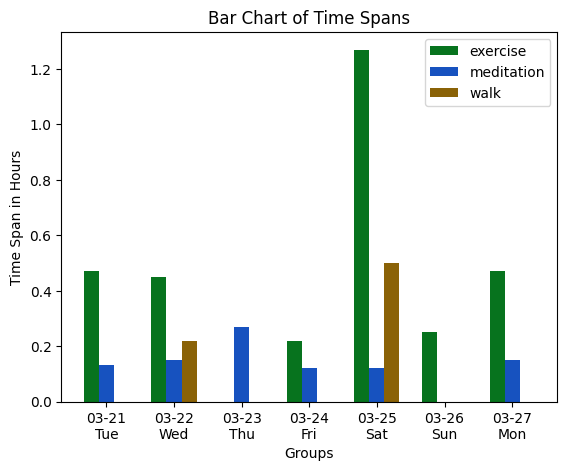

In [4]:
# self calm
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "exercise": {
            "color": "#07731e",
            "time_span_minutes": time_interval_metrics["exercise"],
        },
        "meditation": {
            "color": "#1752bf",
            "time_span_minutes": time_interval_metrics["meditation"],
        },
        "walk": {
            "color": "#8a6207",
            "time_span_minutes": time_interval_metrics["walk"],
        },
    }
)

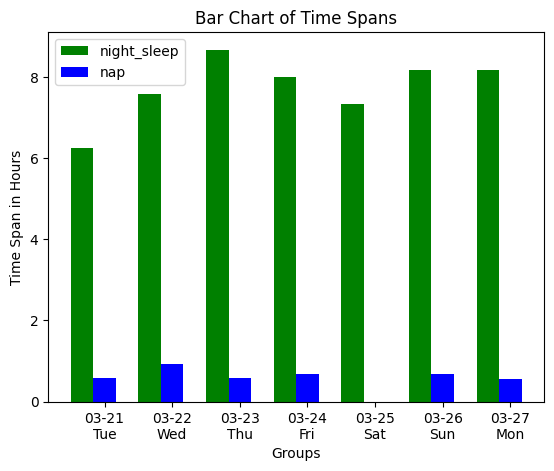

In [5]:
# sleep
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "night_sleep": {
            "color": "green",
            "time_span_minutes": time_interval_metrics["sleep"]["night_sleep"],
        },
        "nap": {
            "color": "blue",
            "time_span_minutes": time_interval_metrics["sleep"]["nap"],
        },
    }
)

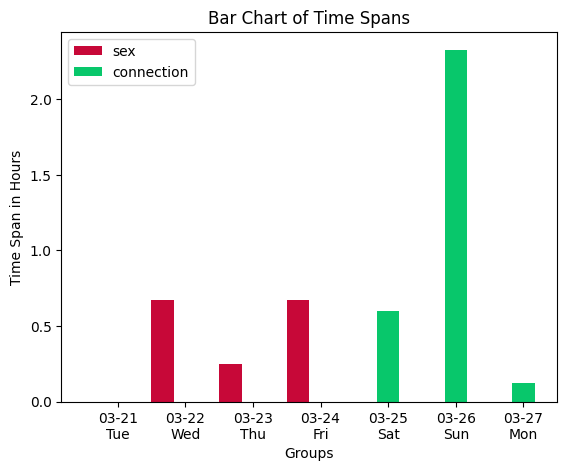

In [6]:
# human connection: sex, connection, joyful
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "sex": {
            "color": "#c70838",
            "time_span_minutes": time_interval_metrics["sex"],
        },
        "connection": {
            "color": "#08c76b",
            "time_span_minutes": time_interval_metrics["connection"],
        }
    }
)

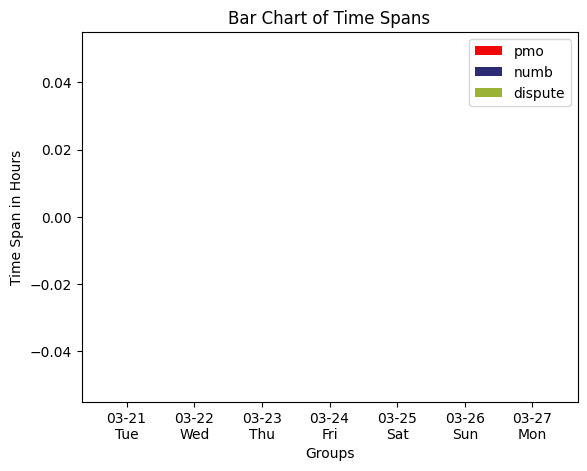

In [7]:
# time I regret spent: numb, dispute, pmo
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "pmo": {
            "color": "#f20707",
            "time_span_minutes": time_interval_metrics["pmo"],
        },
        "numb": {
            "color": "#2d2a75",
            "time_span_minutes": time_interval_metrics["numb"],
        },
        "dispute": {
            "color": "#9ab336",
            "time_span_minutes": time_interval_metrics["dispute"],
        },
    }
)

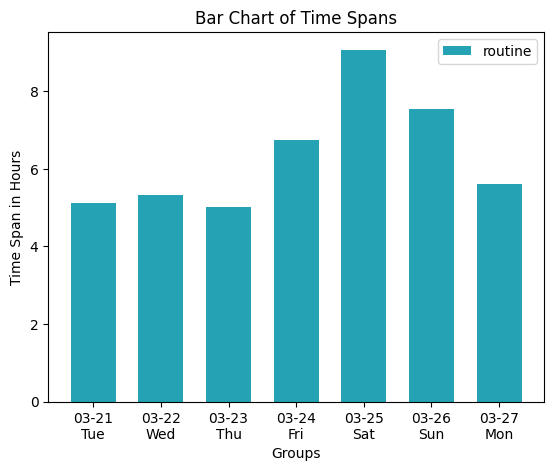

In [8]:
# Time for routine
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "routine": {
            "color": "#25a2b3",
            "time_span_minutes": time_interval_metrics["routine"],
        },
    }
)

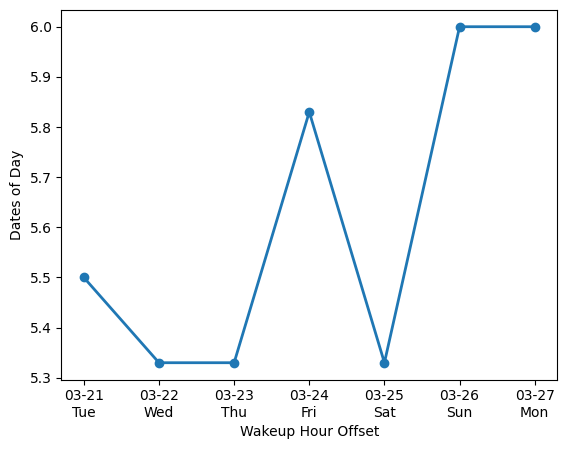

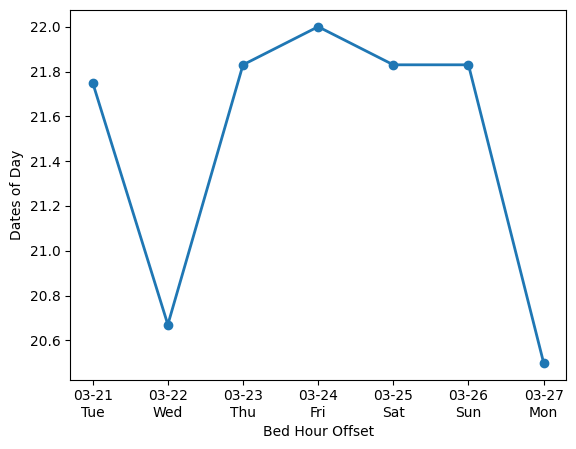

In [9]:
draw_wakeup_plot(
    wakeup_timestamps=report.get_event_metrics()["wakeup"],
    dates=report.dates(),
)
draw_bed_plot(
    bed_timestamps=report.get_event_metrics()["bed"],
    dates=report.dates(),
)

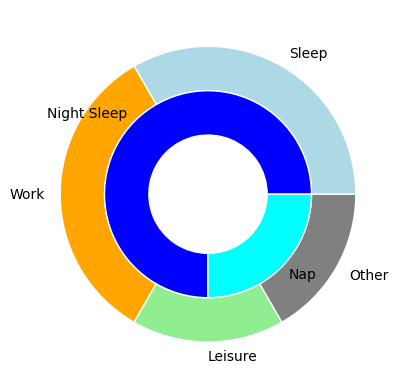

In [10]:
import matplotlib.pyplot as plt

# Outer pie chart data
outer_data = [8, 8, 4, 4]
outer_labels = ['Sleep', 'Work', 'Leisure', 'Other']

# Inner pie chart data (for Sleep partition)
inner_data = [6, 2]
inner_labels = ['Night Sleep', 'Nap']

# Define colors for both pie charts
outer_colors = ['lightblue', 'orange', 'lightgreen', 'gray']
inner_colors = ['blue', 'cyan']

# Draw the outer pie chart
fig, ax = plt.subplots()
ax.pie(outer_data, labels=outer_labels, colors=outer_colors, radius=1, wedgeprops=dict(width=0.3, edgecolor='white'))

# Draw the inner pie chart
ax.pie(inner_data, labels=inner_labels, colors=inner_colors, radius=0.7, wedgeprops=dict(width=0.3, edgecolor='white'))

ax.set_aspect('equal')  # Set aspect ratio to 'equal' to make the pie chart circular

plt.show()
